# <b><u>Crime statistics for the City of Atlanta between 2009 and 2017</u></b>
## We will perform some Exploratory Data Analysis on the APD crime statistics dataset for the years 2009 - 2017.
## 1.  Initial dataset modifications to prepare for data visualization and analysis
### Import the necessary libraries

In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set(style="ticks", color_codes=True)
import pandas as pd
import numpy as np

### put all datasets into one Pandas dataframe

In [2]:
df2009 = pd.read_csv('../projects/datasets/COBRA-2009/COBRA-2009.csv', dtype={'Location Type':str})
df2010 = pd.read_csv('../projects/datasets/COBRA-2010/COBRA-2010.csv', dtype={'Location Type':str})
df2011 = pd.read_csv('../projects/datasets/COBRA-2011/COBRA-2011.csv', dtype={'Location Type':str})
df2012 = pd.read_csv('../projects/datasets/COBRA-2012/COBRA-2012.csv', dtype={'Location Type':str})
df2013 = pd.read_csv('../projects/datasets/COBRA-2013/COBRA-2013.csv', dtype={'Location Type':str})
df2014 = pd.read_csv('../projects/datasets/COBRA-2014/COBRA-2014.csv', dtype={'Location Type':str})
df2015 = pd.read_csv('../projects/datasets/COBRA-2015/COBRA-2015.csv', dtype={'Location Type':str})
df2016 = pd.read_csv('../projects/datasets/COBRA-2016/COBRA-2016.csv', dtype={'Location Type':str})
df2017 = pd.read_csv('../projects/datasets/COBRA-2017/COBRA-2017.csv', dtype={'Location Type':str})
dataframes = [df2009,df2010,df2011,df2012,df2013,df2014,df2015,df2016,df2017]
df = pd.concat(dataframes, sort=True)
df = df.reset_index(drop=True)
df.head()

,Apartment Number,Apartment Office Prefix,Beat,Latitude,Location,Location Type,Longitude,NPU,Neighborhood,Occur Date,Occur Time,Possible Date,Possible Time,Report Date,Report Number,Shift,Shift Occurence,UCR #,UCR Literal
0,NaN,NaN,408.0,33.68841,3030 HEADLAND DR SW,12,-84.48742,R,Greenbriar,2009-01-01,815,2009-01-01,820.0,2009-01-01,90010721,D,Day Watch,630,LARCENY-NON VEHICLE
1,NaN,NaN,408.0,33.68845,2841 GREENBRIAR PKWY,8,-84.49328,R,Greenbriar,2009-01-01,1145,2009-01-01,1148.0,2009-01-01,90010930,D,Day Watch,630,LARCENY-NON VEHICLE
2,NaN,NaN,506.0,33.75320,12 BROAD ST SW,9,-84.39201,M,Downtown,2009-01-01,1330,2009-01-01,1330.0,2009-01-01,90011083,D,Day Watch,630,LARCENY-NON VEHICLE
3,NaN,NaN,413.0,33.75735,3500 MARTIN L KING JR DR SW,8,-84.50282,H,Adamsville,2009-01-01,1500,2009-01-01,1520.0,2009-01-01,90011208,NaN,Unknown,630,LARCENY-NON VEHICLE
4,NaN,NaN,204.0,33.84676,3393 PEACHTREE RD NE,8,-84.36212,B,Lenox,2009-01-01,1450,2009-01-01,1510.0,2009-01-01,90011218,E,Evening Watch,630,LARCENY-NON VEHICLE


### "Shift" and "Shift Occurence" have the same information

In [3]:
df = df.drop(['Shift'],axis=1)

### We will assume that NA values for "Apartment Number" and "Apartment Office Prefix" mean that the building is a stand-alone building with the address shown in "Location."  Fill unknown "Apartment Number" and "Apartment Office Prefix" values with zeroes.

In [4]:
df['Apartment Number'] = df['Apartment Number'].fillna(0)
df['Apartment Office Prefix'] = df['Apartment Office Prefix'].fillna(0)

### Unknown "Beat" information will be marked with zero so we can convert it to integer values

In [5]:
df['Beat'] = df['Beat'].fillna(0).astype('int')

### "Location Type" missing values will be filled in with zero values.  "Location" and "Neighborhood" missing values will be filled in with "Unknown" values.

In [6]:
df['Location Type'] = df['Location Type'].fillna(0)
df['Neighborhood'] = df['Neighborhood'].fillna('Unknown')
df['Location'] = df['Location'].fillna('Unknown')

### convert "Occur Date", "Report Date" and "Possible Date" to datetime format

In [7]:
df['Occur Date'] = pd.to_datetime(df['Occur Date'])
df['Report Date'] = pd.to_datetime(df['Report Date'])
df['Possible Date'] = pd.to_datetime(df['Possible Date'])

In [8]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Apartment Number             0
Apartment Office Prefix      0
Beat                         0
Latitude                     0
Location                     0
Location Type                0
Longitude                    0
NPU                        111
Neighborhood                 0
Occur Date                   0
Occur Time                   0
Possible Date               18
Possible Time               19
Report Date                  0
Report Number                0
Shift Occurence              0
UCR #                        0
UCR Literal                  0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292268 entries, 0 to 292267
Data columns (total 18 columns):
Apartment Number           292268 non-null object
Apartment Office Prefix    292268 non-null object
Beat                       292268 non-null int64
Latitude                   292268 non-null float64
Location                   292268 non-null object
Location Type              292268 non-null object
Longitude                  292268 non-null float64
NPU                        292157 non-null object
Neighborhood               292268 non-null object
Occur Date                 292268 non-null datetime64[ns]
Occur Time                 292268 non-null int64
Possible Date              292250 non-null datetime64[ns]
Possible Time              292249 non-null float64
Report Date                292268 non-null datetime64[ns]
Report Number              292268 non-null int64
Shift Occurence            292268 non-null object
UCR #                      292268 non-null int64
UCR Literal     

## 2. Some Exploratory Data Analysis on the modified dataset
### Is there any temporal relation to the number of crime incidents?  
### We will create a column with only the year value of the occurence date and graph the number of crime incidents per year.

In [10]:
df['Report Year'] = df['Report Date'].dt.year

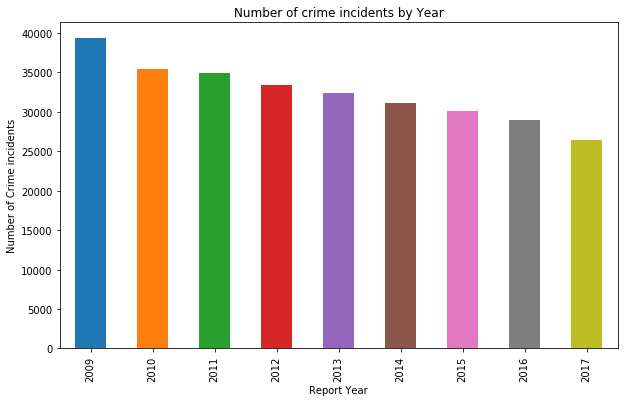

In [11]:
year = df['Report Year'].value_counts()
plt.figure(figsize=(10,6))
plt.ylabel('Number of Crime incidents')
plt.xlabel('Report Year')
plt.title('Number of crime incidents by Year')
year.plot.bar()

### Observation: So it appears that the number of crime incidents has steadily decreased since 2009.  Watching the local news programs you would not think this is the case.
### Is there a spatial relation to the number of crime incidents?
### We will graph the ten neighborhoods that have the highest number of crime  incidents

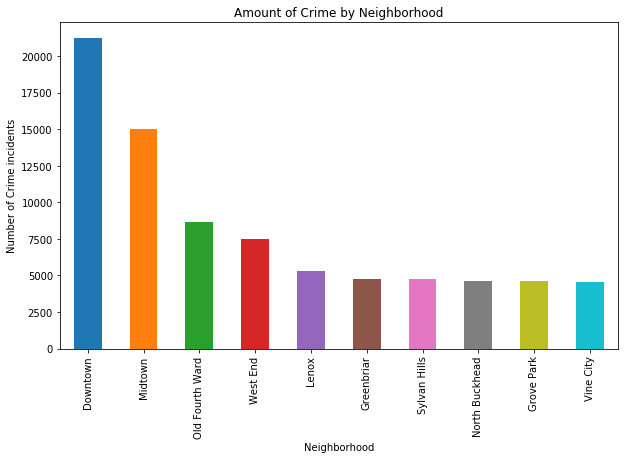

In [12]:
neighborhood = df['Neighborhood'].value_counts()
#'Unknown' is not a neighborhood.  It will be removed.
neighborhood = neighborhood.drop('Unknown', axis=0)
plt.figure(figsize=(10,6))
plt.ylabel('Number of Crime incidents')
plt.xlabel('Neighborhood')
plt.title('Amount of Crime by Neighborhood')
neighborhood[0:10].plot.bar()

### Observation:  It seems that most neighborhoods have the same number of crime incidents except for the top few.  The top three neighborhoods are significantly higher than the others.  For the complete time period 2009 - 2017 you had greater than four times (4x) chance of being involved in a crime incident in the Downtown neighborhood as compared with the Vine City neighborhood.  And greater than three times (3x) chance in the Midtown neighborhood.
### Let us combine the temporal and spatial relations from above to see if any additional information can be obtained.  We will graph the number of crime incidents for the top 5 Neighborhoods per year.

In [13]:
df_neighbor_report_year = df.groupby(['Report Year','Neighborhood']).size().unstack(fill_value=0)
df_neighbor_report_year = df_neighbor_report_year.transpose()
#'Unknown' is not a neighborhood.  It will be removed.
df_neighbor_report_year = df_neighbor_report_year.drop('Unknown', axis=0)
df_neighbor_report_year.head()
u = list(df_neighbor_report_year.columns.values)
df_nry = df_neighbor_report_year.nlargest(20,u)

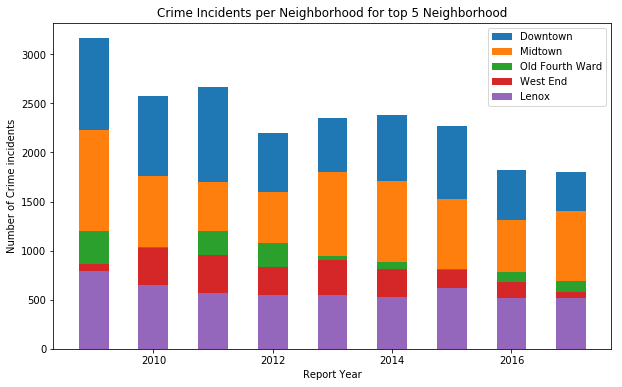

In [14]:
width=0.5
plt.figure(figsize=(10,6))
p0 = plt.bar(u, list(df_nry.iloc[0,:]), width)
p1 = plt.bar(u, list(df_nry.iloc[1,:]), width)
p2 = plt.bar(u, list(df_nry.iloc[2,:]), width)
p3 = plt.bar(u, list(df_nry.iloc[3,:]), width)
p4 = plt.bar(u, list(df_nry.iloc[4,:]), width)

plt.ylabel('Number of Crime incidents')
plt.xlabel('Report Year')
plt.title('Crime Incidents per Neighborhood for top 5 Neighborhood')
plt.yticks(np.arange(0, 3500, 500))
plt.legend((p0[0],p1[0],p2[0],p3[0],p4[0]), list(df_nry.index.values))
plt.show()

### Observation:  For the top 5 Neighborhoods it seems there is a decrease in the overall number of incidents.  But their relative ranking compared to each other is not changing.  Also, it seems that there is more of a decrease in the Downtown neighborhood than any of the other four.  For the Downtown neighborhood the number of incidents has decreased from ~3000+ to ~2000 for a ~1000+ difference.  Comparing that with the Midtown neighborhood, the decreas is ~2300 to ~1600 for a ~700 difference.

In [15]:
df_nry['diff'] = df_nry.iloc[:,0] - df_nry.iloc[:,8]
df_nry['diff'].iloc[0:2]

Neighborhood
Downtown    1361
Midtown      829
Name: diff, dtype: int64

### Let us get some more detailed location information.
### We will make a 10x10 grid and create 100 different sectors.  We will count the amount of crime that occured in each sector and compare them.

In [16]:
ymin = min(df['Latitude'])
ymax = max(df['Latitude'])
xmin = min(df['Longitude'])
xmax = max(df['Longitude'])
lats = np.linspace(ymin, ymax, 10)
longs = np.linspace(xmin, xmax, 10)

In [17]:
def addSectors(df,lats,longs):
    df['Sector'] = ""
    sector = 0
    for i in range(0,10):
        for j in range(0,10):
            sector = sector + 1
            for u in range(0,len(df)):
                if df.loc[u,'Latitude'] >= lats[j-1] and df.loc[u,'Latitude'] <= lats[j]:
                    if df.loc[u,'Longitude'] >= longs[i-1] and df.loc[u,'Longitude'] <= longs[i]:
                        df.at[u,'Sector'] = sector
    return(df)

In [18]:
df = addSectors(df, lats, longs)

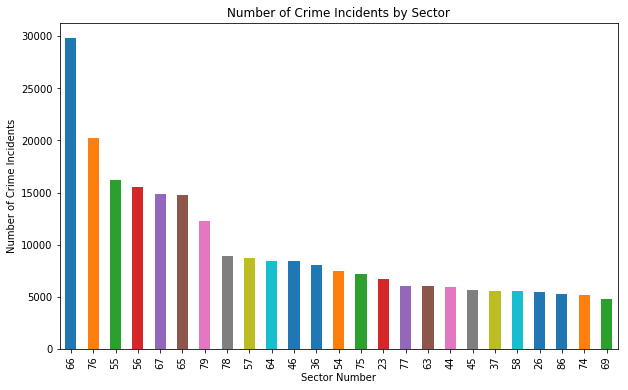

In [19]:
crime_count_by_sector = df['Sector'].value_counts()
plt.figure(figsize=(10,6))
plt.ylabel('Number of Crime Incidents')
plt.xlabel('Sector Number')
plt.title('Number of Crime Incidents by Sector')
crime_count_by_sector[0:25].plot.bar()

### Now we know the crime rate of each sector over the full time period.  Let us see some of the areas to stay away from in order to keep safe.

In [20]:
df_high_crime_areas = df[df['Sector']==crime_count_by_sector[crime_count_by_sector == max(crime_count_by_sector)].index[0]]
dfhca_count = df_high_crime_areas['Location'].value_counts()
dfhca_count[0:10]

12 BROAD ST SW                            536
595 PIEDMONT AVE NE                       505
349 DECATUR ST SE                         330
265 PONCE DE LEON AVE NE                  234
595 PIEDMONT AVE NE @PUBLIX - PIEDMONT    206
360 MARIETTA ST NW                        174
477 PEACHTREE ST NE                       173
265 PEACHTREE CENTER AVE NE               172
50 ALABAMA ST SW                          169
275 BAKER ST NW                           165
Name: Location, dtype: int64